# Reference
- https://hi-ctrl.hatenablog.com/entry/2017/11/07/033829
- https://qiita.com/hikaruyaku/items/021769a76e72ed34a881
- https://y373.sakura.ne.jp/minami/pyctrl

In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
# Parameter
Kt = 1 #Steady-State gain
T = 5 #Time Constant
L = 3 #Dead time
Ts = 0.1

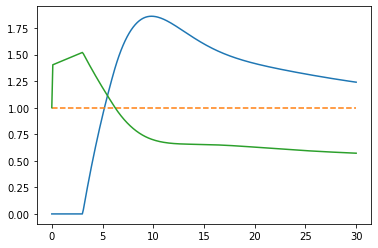

In [208]:
a0 = - T / (Ts + T)
b0 = K * Ts / (Ts + T)
td = int(np.floor(L/Ts))

y = np.zeros(300)
u = np.ones(300)
d = np.random.randn(300) * 0.0
e = np.zeros(300)
yref = np.ones(300) * 1.0

kp = 0.4
Ti = 10.0
Td = 0.0
for k in range(1, 300):
    if td + 1 <= k:
        y[k] = -a0 * y[k - 1] + b0 * u[k - td - 1] + d[k] + a0 * d[k - 1]
    else:
        y[k] = a0 * d[k - 1]
    
    e[k] = yref[k] - y[k] 
    
    du   = kp*((e[k]-e[k-1])+Ts/Ti*e[k]+Td/Ts*(e[k]-2*e[k-1]+e[k-2]))
    u[k] = u[k-1]+du;
    
plt.plot(np.linspace(0, dt*300, 300), y)
plt.plot(np.linspace(0, dt*300, 300), yref, ls='--')
plt.plot(np.linspace(0, dt*300, 300), u)
plt.show()

In [189]:
from control.matlab import *

In [190]:
# 1st-order system 
P = tf([Kt], [T, 1])

# Dead time (Pade approximation)
num4, dem4 = pade(L, 10)
P4 = tf(num4,dem4)

# Combined system
G = P * P4

P


   1
-------
5 s + 1

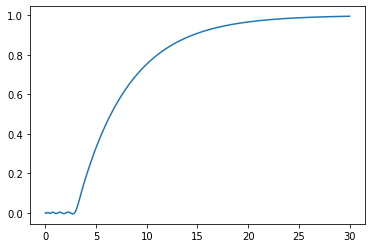

In [191]:
ts = np.linspace(0, 30, 301)
y, t = step(G, ts)
plt.plot(t, y)
plt.show()

In [203]:
kp = 0.8
Ti = 1.0
Td = 0.0
ki = kp/Ti
kd = Td*kp

num = [kd, kp, ki]
den = [1, 0]
C = tf(num, den)

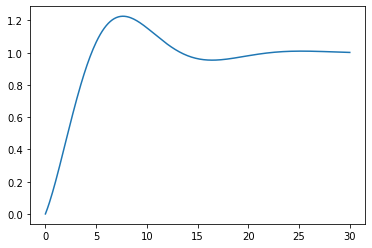

In [206]:
sys = feedback(P*C, 1, -1)
y, t = step(sys, ts)
plt.plot(t, y)
plt.show()

In [197]:
sys


         0.4 s^11 - 14.63 s^10 + 262.5 s^9 - 3024 s^8 + 2.461e+04 s^7 - 1.47e+05 s^6 + 6.494e+05 s^5 - 2.085e+06 s^4 + 4.625e+06 s^3 - 6.328e+06 s^2 + 3.86e+06 s + 4.542e+05
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
5 s^12 + 184.7 s^11 + 3322 s^10 + 3.906e+04 s^9 + 3.16e+05 s^8 + 1.955e+06 s^7 + 8.531e+06 s^6 + 2.92e+07 s^5 + 6.38e+07 s^4 + 1.019e+08 s^3 + 6.747e+07 s^2 + 1.521e+07 s + 4.542e+05

In [198]:
pole(sys)

array([-13.96104487+0.j        ,  -6.48493004+7.81054192j,
        -6.48493004-7.81054192j,  -1.96818105+6.34079067j,
        -1.96818105-6.34079067j,  -1.35508942+4.6216002j ,
        -1.35508942-4.6216002j ,  -1.17386765+2.48222209j,
        -1.17386765-2.48222209j,  -0.58979168+0.j        ,
        -0.39669037+0.j        ,  -0.03500345+0.j        ])